In [19]:
from dask.distributed import Client

client = Client(n_workers=2, threads_per_worker=2, memory_limit="1GB")
client

C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 1613 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:1613/status,
Dashboard: http://127.0.0.1:1613/status,Workers: 2
Total threads: 4,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:1614,Workers: 2
Dashboard: http://127.0.0.1:1613/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:1628,Total threads: 2
Dashboard: http://127.0.0.1:1629/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:1617,


In [20]:
import dask

df = dask.datasets.timeseries()

C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\dask_expr\_collection.py:5833: UserWarning: dask_expr does not support the DataFrameIOFunction protocol for column projection. To enable column projection, please ensure that the signature of `func` includes a `columns=` keyword argument instead.
  warnings.warn(


In [21]:
df.dtypes

name    string[pyarrow]
id                int32
x               float64
y               float64
dtype: object

In [22]:
# This sets some formatting parameters for displayed data.
import pandas as pd

pd.options.display.precision = 2
pd.options.display.max_rows = 10


In [23]:
df.head(3)

,name,id,x,y
timestamp,,,,
2000-01-01 00:00:00,Alice,1020,-0.16,0.15
2000-01-01 00:00:01,Charlie,1029,-0.59,0.64
2000-01-01 00:00:02,George,1000,0.51,0.18


In [24]:
df2 = df[df.y > 0]
df3 = df2.groupby("name").x.std()
df3

Dask Series Structure:
npartitions=1
    float64
        ...
Dask Name: getitem, 8 expressions
Expr=(((Filter(frame=ArrowStringConversion(frame=FromMap(f14e0b6)), predicate=ArrowStringConversion(frame=FromMap(f14e0b6))['y'] > 0))[['name', 'x']]).std(ddof=1, numeric_only=False, split_out=None, observed=False))['x']

In [25]:
computed_df = df3.compute()
type(computed_df)


2024-09-10 14:12:30,157 - distributed.protocol.core - CRITICAL - Failed to deserialize
Traceback (most recent call last):
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 128, in unpackb
    ret = unpacker._unpack()
          ^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 565, in _unpack
    ret.append(self._unpack(EX_CONSTRUCT))
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 585, in _unpack
    key = self._unpack(EX_CONSTRUCT)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 546, in _unpack
    typ, n, obj = self._read_header()
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 447, in _read_header
    self._reserve(1)
  File "C:\Use

CancelledError: ('repartitiontofewer-0e0eb0a77d7b5759e32c296c1ecb956a', 0)

In [26]:
computed_df

NameError: name 'computed_df' is not defined

In [27]:
df4 = df.groupby("name").aggregate({"x": "sum", "y": "max"})
df4.compute()


2024-09-10 14:12:31,679 - distributed.protocol.core - CRITICAL - Failed to deserialize
Traceback (most recent call last):
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 128, in unpackb
    ret = unpacker._unpack()
          ^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 565, in _unpack
    ret.append(self._unpack(EX_CONSTRUCT))
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 585, in _unpack
    key = self._unpack(EX_CONSTRUCT)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 546, in _unpack
    typ, n, obj = self._read_header()
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 447, in _read_header
    self._reserve(1)
  File "C:\Use

CancelledError: ('repartitiontofewer-5c3883334e91192d6a3ad6572b2e453a', 0)

In [28]:
df4 = df4.repartition(npartitions=1)
joined = df.merge(
    df4, left_on="name", right_index=True, suffixes=("_original", "_aggregated")
)
joined.head()

2024-09-10 14:12:32,033 - distributed.protocol.core - CRITICAL - Failed to deserialize
Traceback (most recent call last):
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 128, in unpackb
    ret = unpacker._unpack()
          ^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 565, in _unpack
    ret.append(self._unpack(EX_CONSTRUCT))
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 585, in _unpack
    key = self._unpack(EX_CONSTRUCT)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 546, in _unpack
    typ, n, obj = self._read_header()
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 447, in _read_header
    self._reserve(1)
  File "C:\Use

CancelledError: ('make-_to_string_dtype-blockwisemerge-blockwisehead-dd9ded2f4317d859370361f10855f4c6', 0)

In [29]:
df = df.persist()

In [30]:
df[["x", "y"]].resample("1h").mean().head()

,x,y
timestamp,,
2000-01-01 00:00:00,1.39e-02,5.45e-03
2000-01-01 01:00:00,1.12e-02,-1.33e-02
2000-01-01 02:00:00,-1.42e-03,6.36e-03
2000-01-01 03:00:00,4.95e-05,-6.02e-03
2000-01-01 04:00:00,1.41e-02,-9.34e-03


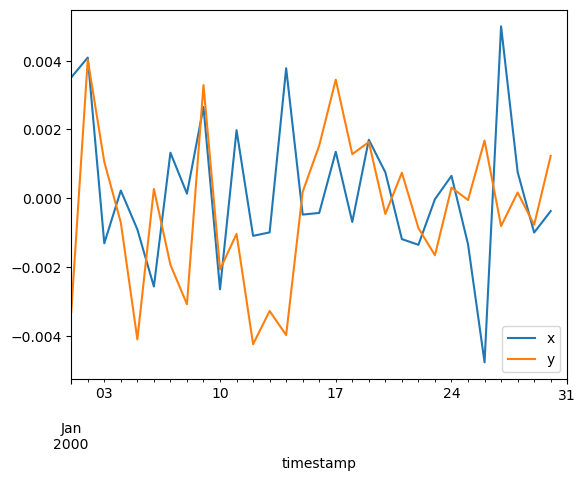

In [31]:
%matplotlib inline
df[['x', 'y']].resample('24h').mean().compute().plot();



In [32]:
df[["x", "y"]].rolling(window="24h").mean().head()

2024-09-10 14:12:42,290 - distributed.protocol.core - CRITICAL - Failed to deserialize
Traceback (most recent call last):
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\distributed\protocol\core.py", line 175, in loads
    return msgpack.loads(
           ^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\msgpack\fallback.py", line 136, in unpackb
    raise ExtraData(ret, unpacker._get_extradata())
msgpack.exceptions.ExtraData: unpack(b) received extra data.
2024-09-10 14:12:42,297 - distributed.core - ERROR - Exception while handling op register-client
Traceback (most recent call last):
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\distributed\core.py", line 970, in _handle_comm
    result = await result
             ^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\distributed\scheduler.py", line 5710, in add_client
    await self.handle_stream(comm=comm, extra={"client": client})
  File

CancelledError: ('_overlap_chunk-blockwisehead-14601ee2b4a065a61cf40aef91980d89', 0)

In [33]:
df.loc["2000-01-05"]

,name,id,x,y
npartitions=1,,,,
2000-01-05 00:00:00.000000000,string,int32,float64,float64
2000-01-05 23:59:59.999999999,...,...,...,...


In [34]:
%time df.loc['2000-01-05'].compute()



CancelledError: ('loc-971a67f67bde73c3bd94f729100d401d', 0)

In [14]:
df5 = df.set_index("name")
df5


CancelledError: ('min-9690aedf9a8690997a37f49a27a85b8d', 15)

2024-09-10 14:05:07,541 - distributed.scheduler - ERROR - Error transitioning ('make-_to_string_dtype-1cd57e40688b1ac90205fd139579b7db', 22) from 'waiting' to 'processing'
Traceback (most recent call last):
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\distributed\scheduler.py", line 1958, in _transition
    recommendations, client_msgs, worker_msgs = func(
                                                ^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\distributed\scheduler.py", line 2337, in _transition_waiting_processing
    return self._add_to_processing(ts, ws, stimulus_id=stimulus_id)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\distributed\scheduler.py", line 3257, in _add_to_processing
    return {}, {}, {ws.address: [self._task_to_msg(ts)]}
                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\si

CancelledError: ('min-9690aedf9a8690997a37f49a27a85b8d', 8)

In [15]:
df5 = df5.persist()
df5

CancelledError: ('min-9690aedf9a8690997a37f49a27a85b8d', 20)

In [16]:
%time df5.loc['Alice'].compute()

2024-09-10 14:05:09,819 - distributed.scheduler - ERROR - Error transitioning ('make-_to_string_dtype-1cd57e40688b1ac90205fd139579b7db', 22) from 'waiting' to 'processing'
Traceback (most recent call last):
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\distributed\scheduler.py", line 1958, in _transition
    recommendations, client_msgs, worker_msgs = func(
                                                ^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\distributed\scheduler.py", line 2337, in _transition_waiting_processing
    return self._add_to_processing(ts, ws, stimulus_id=stimulus_id)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\site-packages\distributed\scheduler.py", line 3257, in _add_to_processing
    return {}, {}, {ws.address: [self._task_to_msg(ts)]}
                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\test.DESKTOP-ODO5P7A\anaconda3\Lib\si

CancelledError: ('max-c1dd0d74a707ead2e78a9998c6ae0b11', 28)

In [17]:
from sklearn.linear_model import LinearRegression


def train(partition):
    if not len(partition):
        return
    est = LinearRegression()
    est.fit(partition[["x"]].values, partition.y.values)
    return est

In [18]:
df6 = df5.groupby("name").apply(
    train, meta=("LinearRegression", object)
).compute()
df6

CancelledError: ('max-c1dd0d74a707ead2e78a9998c6ae0b11', 10)